In [1]:
# takes 15s
# read acbl events sql table, cleanup, write to acbl_events_cleaned.pkl.

# Next steps:
# any training needed?

# Previous steps:
# acbl-download-details-to-json.ipynb
# acbl-json-to-sql.ipynb

# todo:
# more reports

In [2]:
import config
import pandas as pd
import pathlib
import pickle
import sqlalchemy
import mlBridgeLib

import matplotlib
import matplotlib.pyplot as plt

In [3]:
# override pandas display options
mlBridgeLib.pd_options_display()

In [4]:
rootPath = pathlib.Path('e:/bridge/data')
acblPath = rootPath.joinpath('acbl')

In [5]:
# using pathlib to create sqlite path.
db_connection_string = 'sqlite:///'+acblPath.joinpath('acbl-details.sqlite').as_posix()
db_connection_string

'sqlite:///e:/bridge/data/acbl/acbl-details.sqlite'

In [6]:
def db_to_frames_dict(engine):
    meta = sqlalchemy.MetaData()
    meta.reflect(engine)
    tables = meta.tables.keys()
    cnx = engine.raw_connection()
    return {t: pd.read_sql(f'SELECT * FROM {t}', cnx ) for t in tables}

In [7]:
# create dict of sql SELECT statements.
sql_selects_d = {
    'events':'SELECT id AS event_id, name AS event_name, club_name, club_id_number, type as event_type, rating, board_scoring_method, stratification_type, winner_type, club_class, tb_count, club_session, start_date, end_date, mpLimits, olExists FROM events'
    }

In [8]:
# takes 2m15s
dfs = {}
for k,v in sql_selects_d.items():
    engine = sqlalchemy.create_engine(db_connection_string) #, echo=True)
    with engine.connect() as con:
        if False:
            dfs = db_to_frames_dict(engine)
        else:
            print(f'{k}:{v}')
            dfs[k] = pd.read_sql(v, con)
    engine.dispose()

events:SELECT id AS event_id, name AS event_name, club_name, club_id_number, type as event_type, rating, board_scoring_method, stratification_type, winner_type, club_class, tb_count, club_session, start_date, end_date, mpLimits, olExists FROM events


In [9]:
for k,v in dfs.items():
    display(k,v.head(),v.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 313220 entries, 0 to 313219
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   event_id              313220 non-null  int64  
 1   event_name            313220 non-null  object 
 2   club_name             313220 non-null  object 
 3   club_id_number        313220 non-null  int64  
 4   event_type            313220 non-null  object 
 5   rating                313220 non-null  int64  
 6   board_scoring_method  313220 non-null  object 
 7   stratification_type   313220 non-null  object 
 8   winner_type           313220 non-null  int64  
 9   club_class            313220 non-null  int64  
 10  tb_count              313220 non-null  float64
 11  club_session          313220 non-null  object 
 12  start_date            313220 non-null  object 
 13  end_date              313220 non-null  object 
 14  mpLimits              313220 non-null  object 
 15  

'events'

,event_id,event_name,club_name,club_id_number,event_type,rating,board_scoring_method,stratification_type,winner_type,club_class,tb_count,club_session,start_date,end_date,mpLimits,olExists
0,100961,Monday Evening Pairs,Cariboo Bridge Club 1,100040,PAIRS,1,MATCH_POINTS,HIGHEST,1,4,3.50,Monday Evening,02/17/2020,02/17/2020,MP Limits: None,1
1,110886,Monday Evening Pairs,Cariboo Bridge Club 1,100040,PAIRS,1,MATCH_POINTS,HIGHEST,1,4,3.50,Monday Evening,02/24/2020,02/24/2020,MP Limits: None,1
2,114736,Monday Evening Pairs,Cariboo Bridge Club 1,100040,PAIRS,1,MATCH_POINTS,HIGHEST,1,4,5.00,Monday Evening,03/02/2020,03/02/2020,MP Limits: None,1
3,126385,Monday Evening Pairs,Cariboo Bridge Club 1,100040,PAIRS,1,MATCH_POINTS,HIGHEST,1,4,5.50,Monday Evening,03/09/2020,03/09/2020,MP Limits: None/100,1
4,126418,Monday Evening Pairs,Cariboo Bridge Club 1,100040,PAIRS,1,MATCH_POINTS,HIGHEST,1,4,4.00,Monday Evening,03/16/2020,03/16/2020,MP Limits: None,1


None

In [10]:
events_dtypes = {
    'event_id':'int64',
    'event_name':'string',
    'club_name':'string',
    'club_id_number':'int64',
    'event_type':'string',
    'rating':'int8',
    'board_scoring_method':'string',
    'stratification_type':'string',
    'winner_type':'int8',
    'club_class':'int8',
    'tb_count':'float32',
    'club_session':'string',
    'start_date':'datetime64[ns]',
    'end_date':'datetime64[ns]',
    'mpLimits':'string',
    'olExists':'boolean'
}
df_events = dfs['events']
df_events = df_events.astype(events_dtypes)
display(df_events.isna().sum(), df_events.info(), df_events.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 313220 entries, 0 to 313219
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   event_id              313220 non-null  int64         
 1   event_name            313220 non-null  string        
 2   club_name             313220 non-null  string        
 3   club_id_number        313220 non-null  int64         
 4   event_type            313220 non-null  string        
 5   rating                313220 non-null  int8          
 6   board_scoring_method  313220 non-null  string        
 7   stratification_type   313220 non-null  string        
 8   winner_type           313220 non-null  int8          
 9   club_class            313220 non-null  int8          
 10  tb_count              313220 non-null  float32       
 11  club_session          313220 non-null  string        
 12  start_date            313220 non-null  datetime64[ns]
 13 

event_id                0
event_name              0
club_name               0
club_id_number          0
event_type              0
rating                  0
board_scoring_method    0
stratification_type     0
winner_type             0
club_class              0
tb_count                0
club_session            0
start_date              0
end_date                0
mpLimits                0
olExists                0
dtype: int64

None

,event_id,event_name,club_name,club_id_number,event_type,rating,board_scoring_method,stratification_type,winner_type,club_class,tb_count,club_session,start_date,end_date,mpLimits,olExists
0,100961,Monday Evening Pairs,Cariboo Bridge Club 1,100040,PAIRS,1,MATCH_POINTS,HIGHEST,1,4,3.50,Monday Evening,2020-02-17,2020-02-17,MP Limits: None,True
1,110886,Monday Evening Pairs,Cariboo Bridge Club 1,100040,PAIRS,1,MATCH_POINTS,HIGHEST,1,4,3.50,Monday Evening,2020-02-24,2020-02-24,MP Limits: None,True
2,114736,Monday Evening Pairs,Cariboo Bridge Club 1,100040,PAIRS,1,MATCH_POINTS,HIGHEST,1,4,5.00,Monday Evening,2020-03-02,2020-03-02,MP Limits: None,True
3,126385,Monday Evening Pairs,Cariboo Bridge Club 1,100040,PAIRS,1,MATCH_POINTS,HIGHEST,1,4,5.50,Monday Evening,2020-03-09,2020-03-09,MP Limits: None/100,True
4,126418,Monday Evening Pairs,Cariboo Bridge Club 1,100040,PAIRS,1,MATCH_POINTS,HIGHEST,1,4,4.00,Monday Evening,2020-03-16,2020-03-16,MP Limits: None,True


In [11]:
cols = df_events.columns
for col in cols:
    vc = df_events[col].value_counts()
    display(col,len(df_events[col]),len(vc),vc)

'event_id'

313220

313220

2049      1
28071     1
9646      1
15789     1
13740     1
3499      1
1450      1
7593      1
5544      1
26022     1
316720    1
30116     1
19875     1
17826     1
21920     1
109983    1
107934    1
112028    1
11695     1
54704     1
56753     1
52659     1
216515    1
214466    1
220609    1
         ..
191240    1
168711    1
170758    1
164613    1
166660    1
144147    1
131861    1
234279    1
138006    1
236326    1
230181    1
232228    1
242467    1
244514    1
238369    1
240416    1
152351    1
154398    1
148253    1
160539    1
162586    1
156441    1
158488    1
135959    1
2047      1
Name: event_id, Length: 313220, dtype: int64

'event_name'

313220

198796

Open Pairs                                            8538
Monday Afternoon Pairs                                8225
Wednesday Afternoon Pairs                             7395
Tuesday Afternoon Pairs                               6542
Thursday Afternoon Pairs                              6040
Friday Afternoon Pairs                                5916
Friday Morning Pairs                                  3360
Monday Morning Pairs                                  3165
Wednesday Morning Pairs                               2751
Monday Evening Pairs                                  2668
Event Name                                            2571
Tuesday Evening Pairs                                 2479
Tuesday Morning Pairs                                 2388
Thursday Morning Pairs                                2084
Saturday Afternoon Pairs                              2013
Thursday Evening Pairs                                1686
Wednesday Evening Pairs                               15

'club_name'

313220

3379

Sagamore at Shelter Rock          4574
Bridge Academy of North Dallas    2963
Duncan Bridge Center              2936
Honors                            2870
Gryphon II DBC                    2481
Ft Lauderdale Bridge Club         2376
OneWorld BOSTON                   2065
LA Bridge Assn                    2048
The Villages DBC                  1993
Duke City Bridge Club             1898
Bridge 21 DBC                     1750
St Louis Bridge Center            1729
Bridge Boardroom                  1666
Brunswick Bridge                  1651
Vanderbilt BC Of Nashville        1439
Vero Beach Bridge Center          1361
Edmonton Bridge Centre            1347
Palm Beach BC At St Catherine     1345
Fun And Games DBC                 1325
Denver Metro Bridge Studio        1317
Bridge Center of St Paul          1303
Westside Bridge Academy           1298
Chicago Duplicate Bridge          1266
Newtown Bridge Club               1239
Grand River Bridge Club           1217
                         

'club_id_number'

313220

2429

266064    4584
260117    3496
263830    2936
232132    2870
248732    2481
217489    2477
108571    2377
221739    2370
267476    2122
277178    2065
103333    1898
239152    1813
166520    1783
262410    1755
275388    1750
239343    1666
272740    1655
105346    1541
267120    1512
218727    1456
225987    1449
206037    1413
199240    1394
100222    1371
267005    1353
          ... 
226811       1
274175       1
271569       1
277251       1
253633       1
248757       1
134007       1
272971       1
905158       1
248781       1
197012       1
271700       1
269985       1
254045       1
901405       1
112136       1
902296       1
277400       1
904979       1
122838       1
248096       1
276527       1
266999       1
212993       1
901025       1
Name: club_id_number, Length: 2429, dtype: int64

'event_type'

313220

2

PAIRS         313135
INDIVIDUAL        85
Name: event_type, dtype: Int64

'rating'

313220

53

1     222864
68     13725
70     11960
2       8264
14      6057
30      5956
3       5065
55      4607
43      4187
69      3969
72      3359
73      3154
20      3040
4       3008
74      1928
63      1812
66      1740
7       1711
12      1270
8       1094
71       860
75       523
0        405
33       397
32       280
       ...  
40       155
25       151
50       146
18       146
51       143
47        87
24        67
17        66
44        62
48        58
65        48
15        42
21        31
45        29
58        28
64        24
28        20
38        15
56        15
57        14
27         8
49         6
61         3
60         1
59         1
Name: rating, Length: 53, dtype: int64

'board_scoring_method'

313220

7

MATCH_POINTS    312331
BUTLER_IMPS        668
CROSS_IMPS         151
OTHER               51
IMPS                14
AGGREGATE            3
HYBRID               2
Name: board_scoring_method, dtype: Int64

'stratification_type'

313220

2

AVERAGE    193814
HIGHEST    119406
Name: stratification_type, dtype: Int64

'winner_type'

313220

2

2    193290
1    119930
Name: winner_type, dtype: int64

'club_class'

313220

4

4    281280
3     30537
2      1302
1       101
Name: club_class, dtype: int64

'tb_count'

313220

122

5.00     28127
6.00     28123
7.00     26172
4.00     25705
8.00     23378
3.00     21343
9.00     20510
10.00    17273
11.00    14361
12.00    11912
13.00     9751
14.00     7846
4.50      6405
15.00     6249
3.50      5947
5.50      5631
16.00     5225
6.50      4819
17.00     4084
7.50      4066
18.00     3203
8.50      3170
2.50      2760
9.50      2613
19.00     2574
         ...  
0.50         2
53.00        2
70.00        2
56.00        2
3.25         2
44.50        2
61.00        1
54.00        1
76.50        1
62.00        1
57.00        1
5.25         1
75.50        1
47.50        1
55.00        1
68.50        1
93.00        1
59.00        1
1.50         1
60.00        1
51.50        1
58.00        1
52.50        1
49.50        1
60.50        1
Name: tb_count, Length: 122, dtype: int64

'club_session'

313220

21

Monday Afternoon       33210
Wednesday Afternoon    30199
Tuesday Afternoon      28546
Thursday Afternoon     27455
Friday Afternoon       25967
Friday Morning         18503
Monday Morning         17958
Thursday Morning       16515
Wednesday Morning      16317
Tuesday Morning        16241
Saturday Afternoon     15593
Sunday Afternoon       12903
Tuesday Evening        10227
Monday Evening          9975
Saturday Morning        9432
Wednesday Evening       7880
Thursday Evening        7582
Sunday Morning          3855
Friday Evening          2465
Saturday Evening        1386
Sunday Evening          1011
Name: club_session, dtype: Int64

'start_date'

313220

1638

2020-02-10    1125
2020-03-02    1115
2020-02-03    1109
2020-02-24    1105
2020-03-09    1066
2020-02-17    1027
2020-01-27     970
2020-03-04     968
2020-02-19     967
2020-02-12     959
2020-02-25     954
2020-02-11     952
2020-02-26     936
2020-01-06     934
2020-02-18     932
2020-02-05     932
2020-01-13     931
2020-02-04     928
2020-03-10     923
2020-03-11     921
2020-03-03     914
2020-01-20     876
2020-01-28     847
2020-02-13     847
2020-01-29     840
              ... 
2010-11-18       1
2018-02-01       1
2017-01-19       1
2016-01-07       1
2013-12-12       1
2013-01-03       1
2016-06-30       1
2018-10-02       1
2015-10-26       1
2018-11-07       1
2010-04-22       1
2010-12-09       1
2018-05-24       1
2010-10-28       1
2017-03-20       1
2018-11-29       1
2014-06-05       1
2013-12-05       1
2014-12-18       1
2018-07-19       1
2010-11-04       1
2010-02-25       1
2014-02-14       1
2018-01-25       1
2014-08-28       1
Name: start_date, Length: 1638,

'end_date'

313220

1638

2020-02-10    1125
2020-03-02    1115
2020-02-03    1109
2020-02-24    1105
2020-03-09    1066
2020-02-17    1027
2020-01-27     970
2020-03-04     968
2020-02-19     967
2020-02-12     959
2020-02-25     954
2020-02-11     952
2020-02-26     936
2020-01-06     934
2020-02-18     932
2020-02-05     932
2020-01-13     931
2020-02-04     928
2020-03-10     923
2020-03-11     921
2020-03-03     914
2020-01-20     876
2020-01-28     847
2020-02-13     847
2020-01-29     840
              ... 
2010-11-18       1
2018-02-01       1
2017-01-19       1
2016-01-07       1
2013-12-12       1
2013-01-03       1
2016-06-30       1
2018-10-02       1
2015-10-26       1
2018-11-07       1
2010-04-22       1
2010-12-09       1
2018-05-24       1
2010-10-28       1
2017-03-20       1
2018-11-29       1
2014-06-05       1
2013-12-05       1
2014-12-18       1
2018-07-19       1
2010-11-04       1
2010-02-25       1
2014-02-14       1
2018-01-25       1
2014-08-28       1
Name: end_date, Length: 1638, d

'mpLimits'

313220

156269

MP Limits: None               19359
MP Limits: None/1500/500       7044
MP Limits: None/2000/750       6491
MP Limits: None/1000/300       4246
MP Limits: None/1000/500       4243
MP Limits: None/2000/500       3082
MP Limits: None/2000/1000      2946
MP Limits: None/200/50         2933
MP Limits: None/2500/500       2919
MP Limits: None/500/200        2891
MP Limits: None/1500/300       2773
MP Limits: None/2500/750       2433
MP Limits: None/1500/750       2184
MP Limits: None/2500/1000      2054
MP Limits: None/500            2016
MP Limits: None/750/300        1609
MP Limits: None/300/100        1566
MP Limits: None/500/300        1523
MP Limits: None/500/100        1367
MP Limits: None/None/None      1366
MP Limits: None/200            1354
MP Limits: None/1250/500       1288
MP Limits: 500/200/100         1180
MP Limits: None/3000/1500      1104
MP Limits: 500/300/100         1055
                              ...  
MP Limits: None/6568/64           1
MP Limits: None/1869/512    

'olExists'

313220

2

True     160033
False    153187
Name: olExists, dtype: Int64

In [12]:
df_events.isna().sum()

event_id                0
event_name              0
club_name               0
club_id_number          0
event_type              0
rating                  0
board_scoring_method    0
stratification_type     0
winner_type             0
club_class              0
tb_count                0
club_session            0
start_date              0
end_date                0
mpLimits                0
olExists                0
dtype: int64

In [13]:
# drop non-PAIRS events
rows_to_drop = df_events['event_type'].ne('PAIRS')
display(len(df_events),sum(rows_to_drop),df_events[rows_to_drop].head())
df_events.drop(df_events[rows_to_drop].index,inplace=True)
display(len(df_events),df_events.head())

313220

85

,event_id,event_name,club_name,club_id_number,event_type,rating,board_scoring_method,stratification_type,winner_type,club_class,tb_count,club_session,start_date,end_date,mpLimits,olExists
11281,329371,Individual,Columbia Duplicate Bridge,107318,INDIVIDUAL,2,MATCH_POINTS,HIGHEST,1,3,4.00,Sunday Afternoon,2021-06-13,2021-06-13,MP Limits: None/2000/750,False
11371,63788,Individual,Columbia Duplicate Bridge,107318,INDIVIDUAL,1,MATCH_POINTS,HIGHEST,1,4,4.00,Sunday Afternoon,2019-12-29,2019-12-29,MP Limits: None/2000/750,False
11379,67144,Jr Fund Individual,Columbia Duplicate Bridge,107318,INDIVIDUAL,30,MATCH_POINTS,HIGHEST,1,4,4.00,Sunday Afternoon,2020-01-05,2020-01-05,MP Limits: None/2000/750,False
15953,74222,Wed Mentor Night,Ft Lauderdale Bridge Club,108571,INDIVIDUAL,30,MATCH_POINTS,HIGHEST,1,4,5.00,Wednesday Evening,2020-01-15,2020-01-15,MP Limits: None/2000/500,False
16668,111934,Friday Eve Individual,Cavendish B.C.,109751,INDIVIDUAL,1,MATCH_POINTS,HIGHEST,1,4,3.00,Friday Evening,2020-02-28,2020-02-28,MP Limits: None/1000/500,False


313135

,event_id,event_name,club_name,club_id_number,event_type,rating,board_scoring_method,stratification_type,winner_type,club_class,tb_count,club_session,start_date,end_date,mpLimits,olExists
0,100961,Monday Evening Pairs,Cariboo Bridge Club 1,100040,PAIRS,1,MATCH_POINTS,HIGHEST,1,4,3.50,Monday Evening,2020-02-17,2020-02-17,MP Limits: None,True
1,110886,Monday Evening Pairs,Cariboo Bridge Club 1,100040,PAIRS,1,MATCH_POINTS,HIGHEST,1,4,3.50,Monday Evening,2020-02-24,2020-02-24,MP Limits: None,True
2,114736,Monday Evening Pairs,Cariboo Bridge Club 1,100040,PAIRS,1,MATCH_POINTS,HIGHEST,1,4,5.00,Monday Evening,2020-03-02,2020-03-02,MP Limits: None,True
3,126385,Monday Evening Pairs,Cariboo Bridge Club 1,100040,PAIRS,1,MATCH_POINTS,HIGHEST,1,4,5.50,Monday Evening,2020-03-09,2020-03-09,MP Limits: None/100,True
4,126418,Monday Evening Pairs,Cariboo Bridge Club 1,100040,PAIRS,1,MATCH_POINTS,HIGHEST,1,4,4.00,Monday Evening,2020-03-16,2020-03-16,MP Limits: None,True


In [14]:
# drop non-MATCH_POINTS events
rows_to_drop = df_events['board_scoring_method'].ne('MATCH_POINTS')
display(len(df_events),sum(rows_to_drop),df_events[rows_to_drop].head())
df_events.drop(df_events[rows_to_drop].index,inplace=True)
display(len(df_events),df_events.head())

313135

888

,event_id,event_name,club_name,club_id_number,event_type,rating,board_scoring_method,stratification_type,winner_type,club_class,tb_count,club_session,start_date,end_date,mpLimits,olExists
16,154265,#6844 Pairs Unit 456 - 18 Boards,Cariboo Bridge Club,100040,PAIRS,66,BUTLER_IMPS,HIGHEST,2,4,7.00,Sunday Evening,2020-06-21,2020-06-21,MP Limits: None/1167/786,False
258,136174,#566 **ARLINGTON Tx** 2:05 pm IMP Pairs,Arlington DBC Inc,100222,PAIRS,1,BUTLER_IMPS,HIGHEST,2,4,7.00,Friday Afternoon,2020-05-08,2020-05-08,MP Limits: None/2197/820,False
6592,31354,ACBL Instant Matchpoint,Duke City Bridge Club,103333,PAIRS,29,OTHER,HIGHEST,2,4,14.00,Thursday Afternoon,2019-10-31,2019-10-31,MP Limits: None/3500/1000,True
6593,31355,0-6K ACBL Instant Matchpo,Duke City Bridge Club,103333,PAIRS,29,OTHER,AVERAGE,2,4,14.00,Thursday Afternoon,2019-10-31,2019-10-31,MP Limits: 6000/1000/300,True
13929,131293,#9869 IMPs - Ft Lauderdale/Quick Tricks/Pompano,Ft Lauderdale Bridge Club,108571,PAIRS,1,BUTLER_IMPS,HIGHEST,2,4,8.00,Wednesday Evening,2020-04-22,2020-04-22,MP Limits: None/1047/427,False


312247

,event_id,event_name,club_name,club_id_number,event_type,rating,board_scoring_method,stratification_type,winner_type,club_class,tb_count,club_session,start_date,end_date,mpLimits,olExists
0,100961,Monday Evening Pairs,Cariboo Bridge Club 1,100040,PAIRS,1,MATCH_POINTS,HIGHEST,1,4,3.50,Monday Evening,2020-02-17,2020-02-17,MP Limits: None,True
1,110886,Monday Evening Pairs,Cariboo Bridge Club 1,100040,PAIRS,1,MATCH_POINTS,HIGHEST,1,4,3.50,Monday Evening,2020-02-24,2020-02-24,MP Limits: None,True
2,114736,Monday Evening Pairs,Cariboo Bridge Club 1,100040,PAIRS,1,MATCH_POINTS,HIGHEST,1,4,5.00,Monday Evening,2020-03-02,2020-03-02,MP Limits: None,True
3,126385,Monday Evening Pairs,Cariboo Bridge Club 1,100040,PAIRS,1,MATCH_POINTS,HIGHEST,1,4,5.50,Monday Evening,2020-03-09,2020-03-09,MP Limits: None/100,True
4,126418,Monday Evening Pairs,Cariboo Bridge Club 1,100040,PAIRS,1,MATCH_POINTS,HIGHEST,1,4,4.00,Monday Evening,2020-03-16,2020-03-16,MP Limits: None,True


In [15]:
events_file = acblPath.joinpath('acbl_events_cleaned.pkl')
with open(events_file, 'wb') as f:
    pickle.dump(df_events, f)
print(f"Saved {events_file}: rows:{len(df_events)} size:{events_file.stat().st_size}")

Saved e:\bridge\data\acbl\acbl_events_cleaned.pkl: rows:312247 size:56991893


In [16]:
events_file = acblPath.joinpath('acbl_events_cleaned.pkl')
with open(events_file, 'rb') as f:
    df_events = pickle.load(f)
print(f"Loaded {events_file}: rows:{len(df_events)}")

Loaded e:\bridge\data\acbl\acbl_events_cleaned.pkl: rows:312247


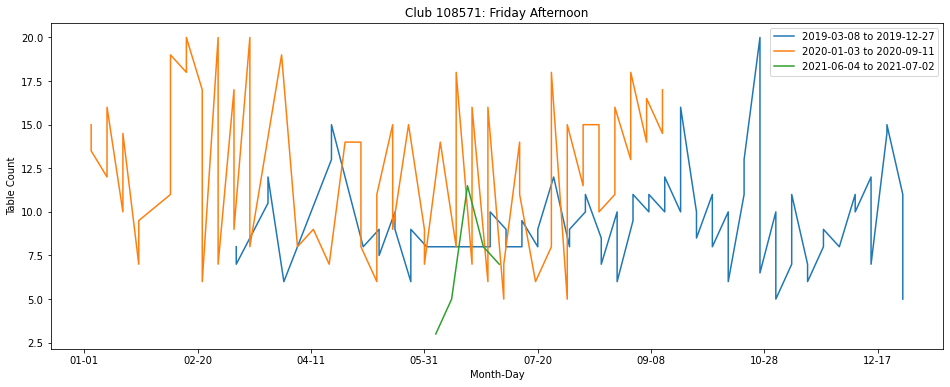

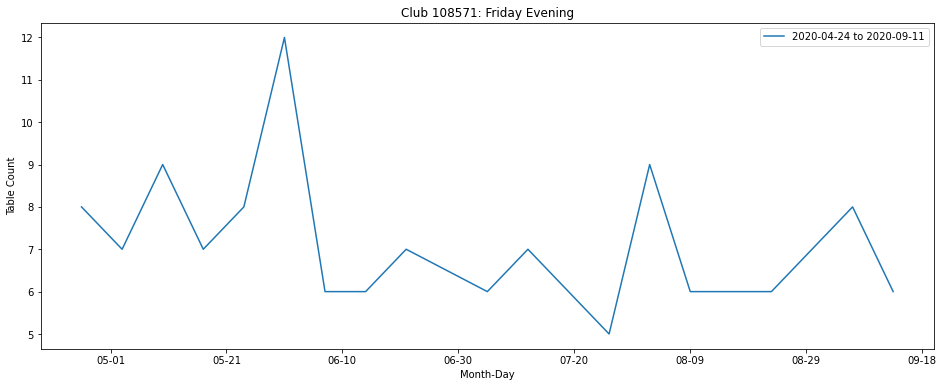

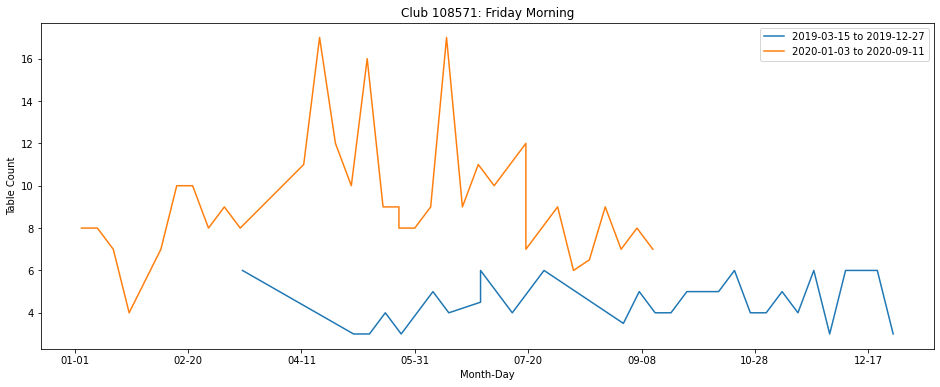

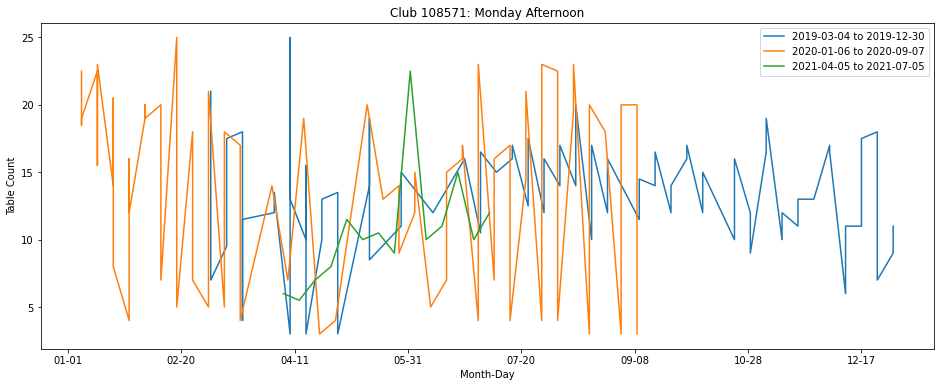

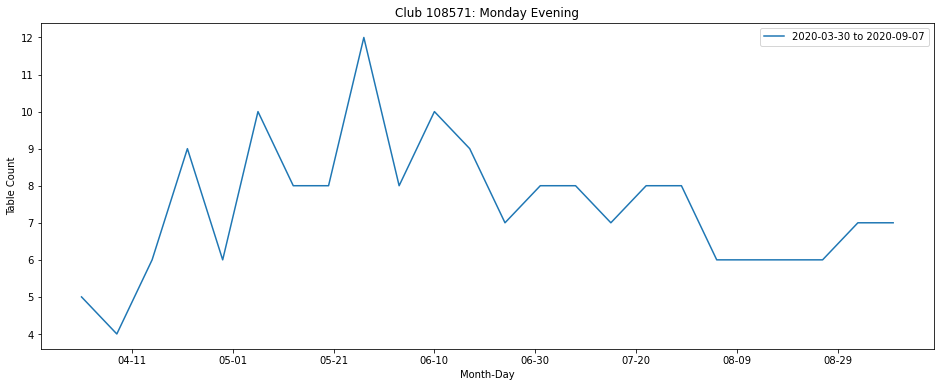

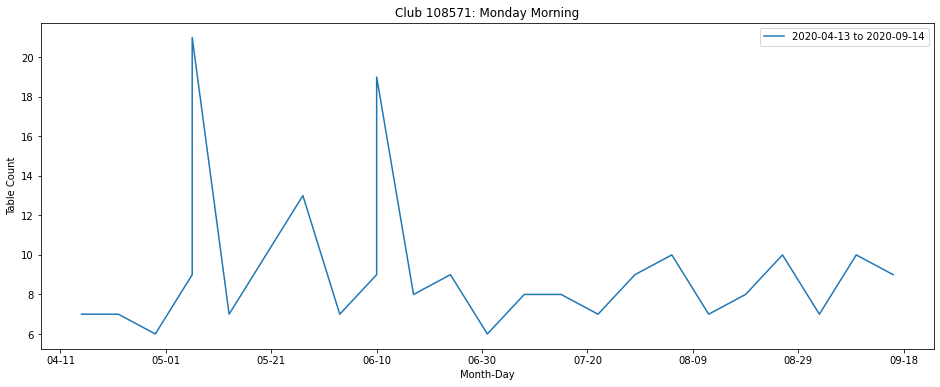

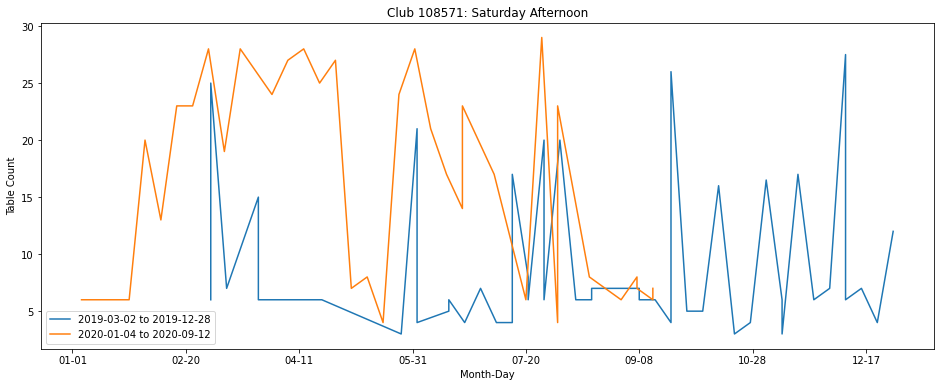

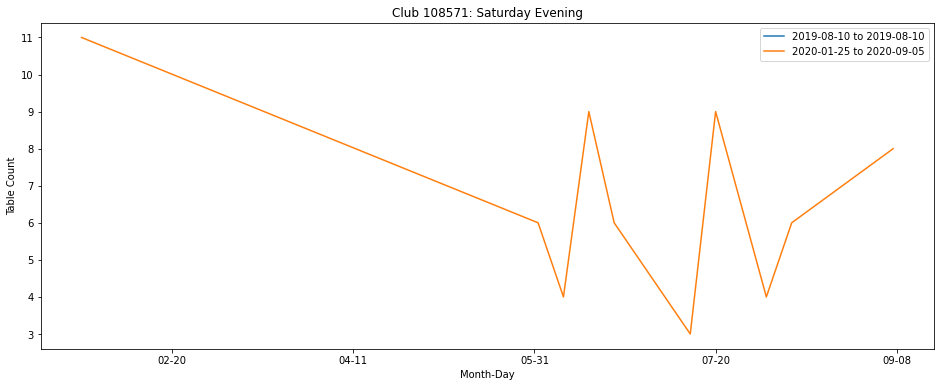

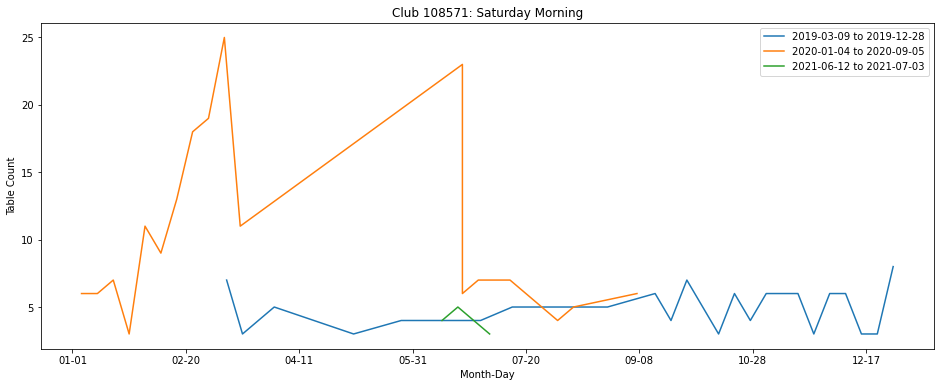

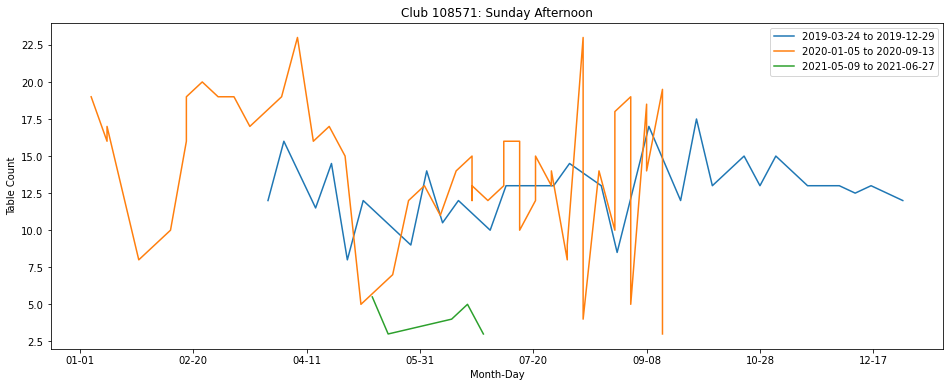

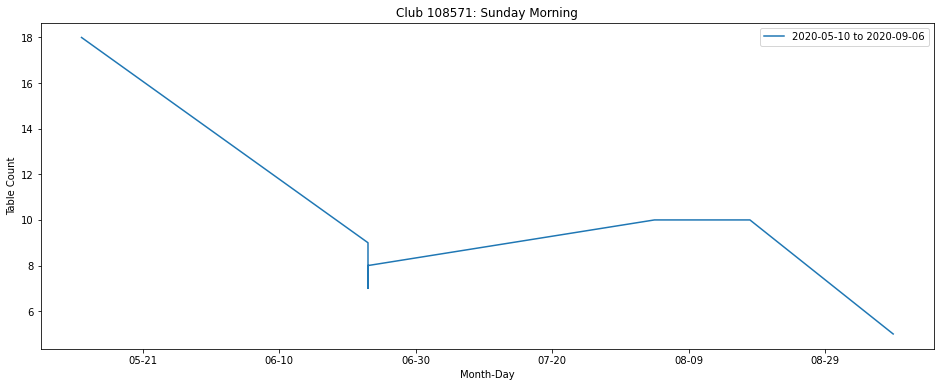

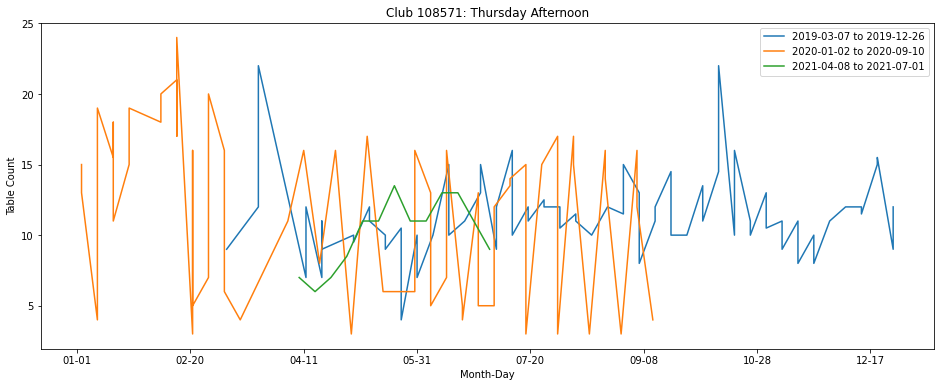

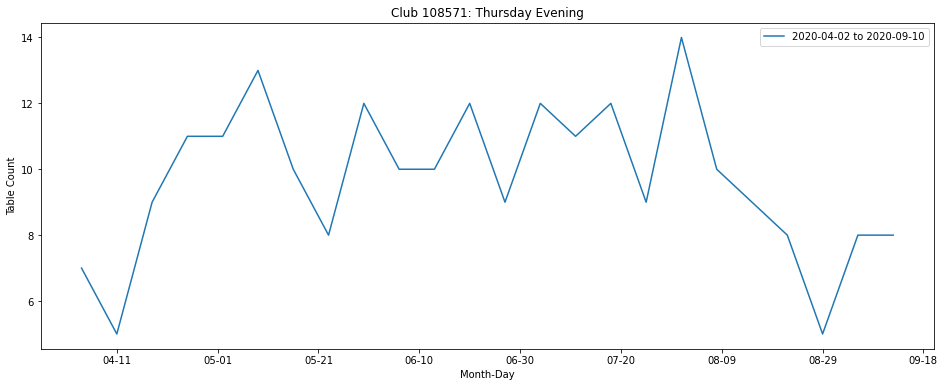

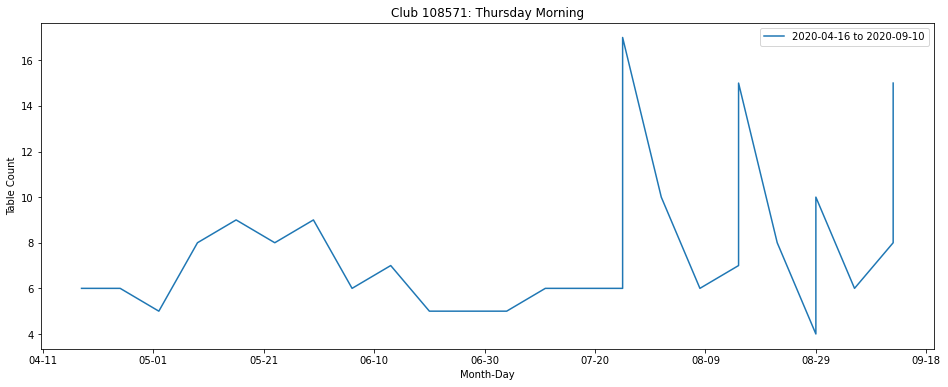

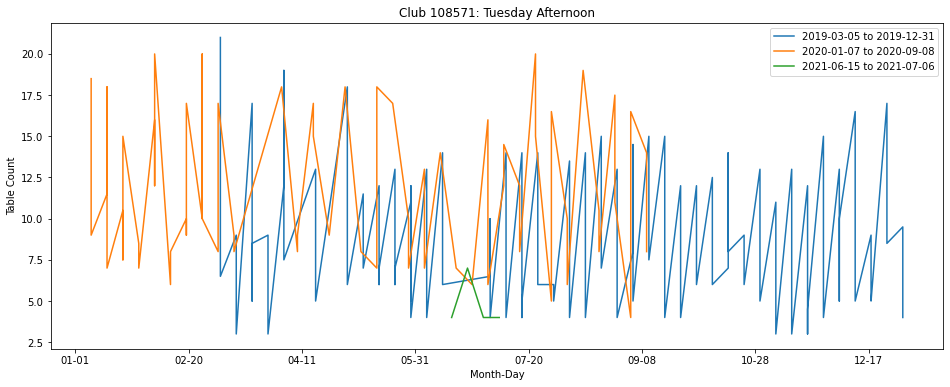

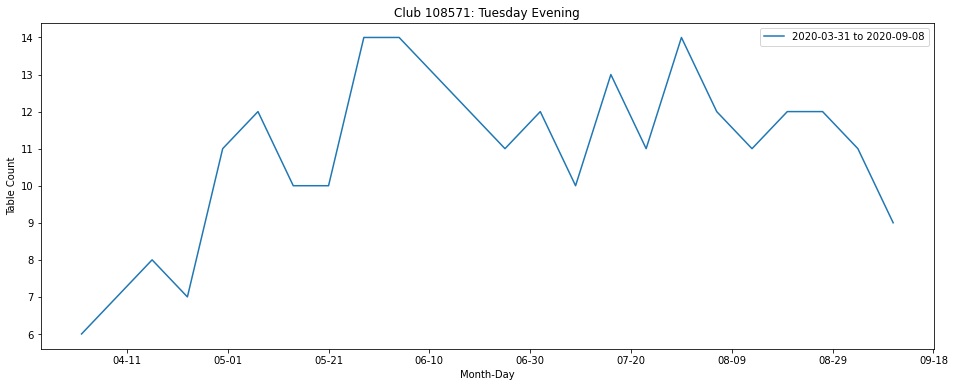

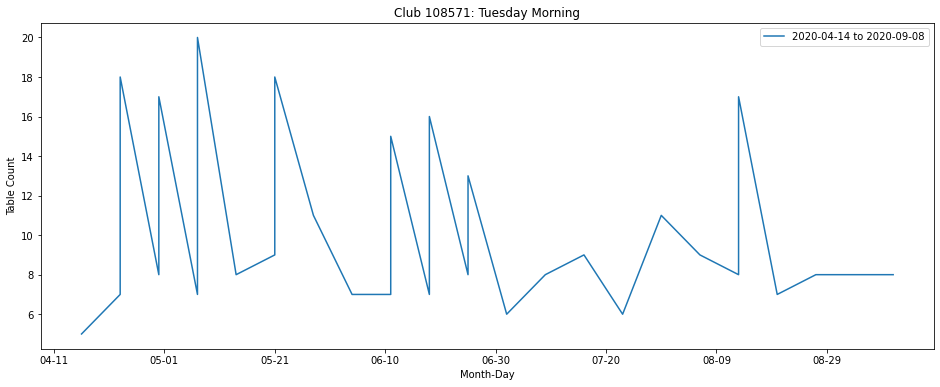

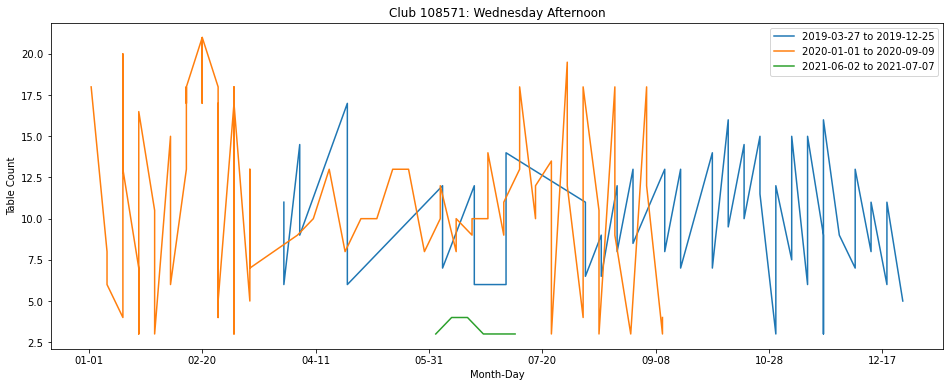

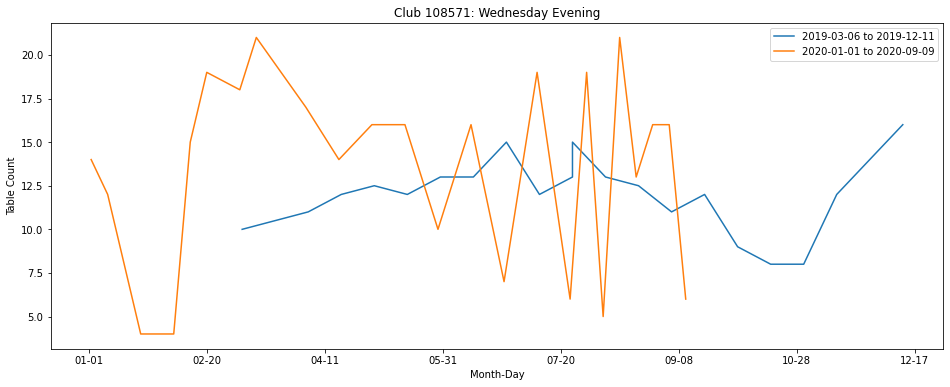

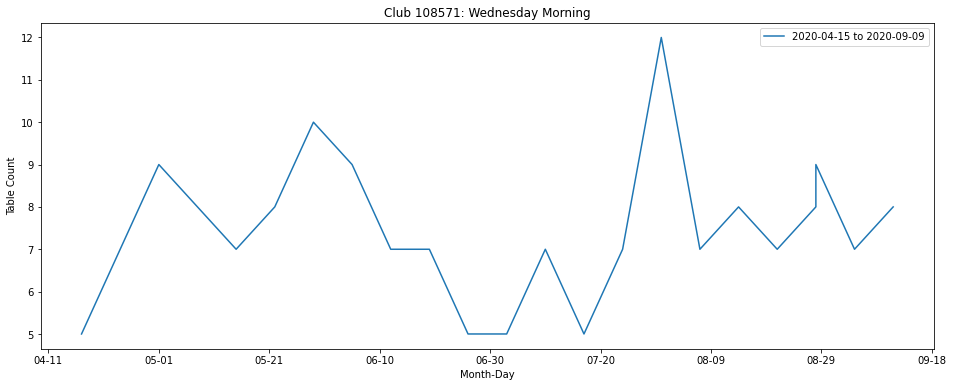

In [17]:
clubs = [108571] # [267096] # select club numbers
cing = df_events.groupby('club_id_number')
for cing_key,cing_df in cing:
    if cing_key not in clubs: # continue if club number is not in list
        continue
    #display(cing_key, len(cing_df), cing_df.head())
    eg = cing_df.groupby('club_session')
    for eg_key, eg_df in eg:
        #display(eg_key, len(eg_df), eg_df.head())
        if len(eg_df) < 10: # skip events with too few dates
            continue
        fig, ax = plt.subplots(figsize=(16,6))
        ax.set(xlabel='Month-Day',ylabel='Table Count',title='Club '+str(cing_key)+': '+eg_key)
        ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%m-%d')) # show month-day for x-axis.
        for year in [2019,2020,2021]:
            row_filter = ~eg_df['olExists'] & eg_df['start_date'].dt.year.eq(year)
            if len(eg_df[row_filter]) == 0: # filter out years with no events
                continue
            #eg_df[row_filter].pivot(index='start_date', columns='club_session', values='tb_count')
            #ax = grp.plot(ax=ax, kind='line', x='x', y='y', c=key, label=key)
            #days = eg_df[row_filter]['start_date'].dt.strftime('%m-%d').sort_values() #.dt.month.sort_values()
            days = eg_df[row_filter]['start_date'].dt.dayofyear.sort_values() # can't figure out indexing unless julian.
            tables = eg_df[row_filter]['tb_count']
            min_date = eg_df[row_filter]['start_date'].min().strftime('%Y-%m-%d')
            max_date = eg_df[row_filter]['start_date'].max().strftime('%Y-%m-%d')
            plt.plot(days,tables,label=min_date+' to '+max_date)
        plt.legend()